## Multiple Schemas


### Private State

In [1]:
from typing import TypedDict

class OverallState(TypedDict):
    foo:int
    
class PrivateState(TypedDict):
    baz:int

In the above code we have created two state one is `OverallState` and `PrivateState`. We will pass the `OverallState`schema when creating the graph but under the graph or nodes will use these `PrivateState`.

In [2]:
def start_node(state: OverallState) -> PrivateState:
    return {
        'baz': state['foo']+1
    }


def end_node(state: PrivateState) -> OverallState:
    return {
        "foo": state['baz']+2
    }

Here in both `start_node` and `end_node` returns and take the `PrivateState` as the input and returns output. 

#### Creating the Graph

In [3]:
from langgraph.graph import StateGraph,START,END

graph = StateGraph(state_schema=OverallState)
graph.add_node("node_1",start_node)
graph.add_node("node_2",end_node)

graph.add_edge(START,"node_1")
graph.add_edge("node_1","node_2")
graph.add_edge("node_2",END)

compile_graph = graph.compile()

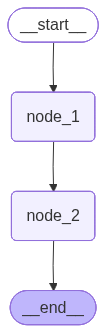

In [4]:
from IPython.display import display,Image

display(Image(compile_graph.get_graph().draw_mermaid_png()))

Invoking the Graph with `OverallState`

In [6]:
state=OverallState(foo=1)
compile_graph.invoke(state,debug=True)

[values] {'foo': 1}
[updates] {'node_1': None}
[updates] {'node_2': {'foo': 4}}
[values] {'foo': 4}


{'foo': 4}

### Input / Ouput Schema

Creating the Schema for input, output and overall using pydantic

In [25]:
from pydantic import BaseModel


class InputSchema(BaseModel):
    question: str


class OuputSchema(BaseModel):
    ouput: str | None = ""


class StateSchema(InputSchema, OuputSchema):
    notes: str

Creating the Graph

In [26]:
def start_message(schema: InputSchema) -> StateSchema:
    return StateSchema(question=schema.question, notes="These is from start message")


def end_message(schema: StateSchema) -> OuputSchema:
    return OuputSchema(ouput="output message")

In [27]:
graph = StateGraph(StateSchema,input_schema=InputSchema,output_schema=OuputSchema)
graph.add_node("node_1",start_message)
graph.add_node("node_2",end_message)

graph.add_edge(START,"node_1")
graph.add_edge("node_1","node_2")
graph.add_edge("node_2",END)

compile_graph2 = graph.compile()


In [28]:
compile_graph2.invoke(InputSchema(question="Who was steve jobs ?"))

{'ouput': 'output message'}